############################################################################################
################## -- Estadística para Ciencia de Datos --##################################
############################################################################################

############################ Analisis Clusters ########################################

Autores : José Cárdenas - André Chávez

In [13]:
#Importar las librerías necesarias en Python.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr  
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

#### Algoritmo de Reducción de Dimensiones + Algoritmos de Segmentación K-Means (++)

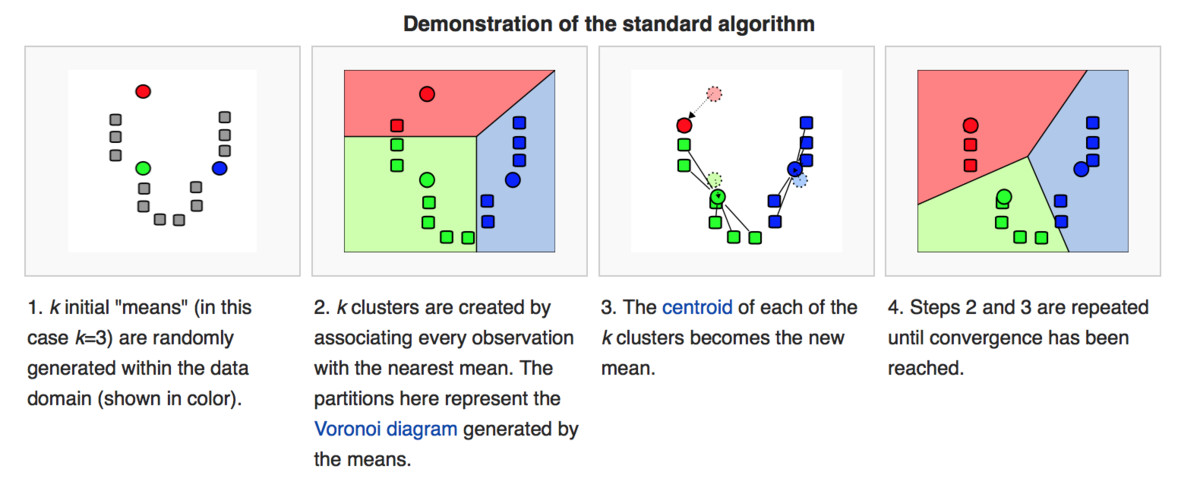

La data de los diferentes paises del mundo tiene como variables los siguientes indicadores.

In [14]:
data = pd.read_csv('IndicadoresMundiales.csv')
data.head(10)

,Pais,Region,TasaGlobalFecundidad,Anticoncepcion,NivelEducHombres,NivelEducMujer,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,Africa,6.69,NaN,NaN,NaN,44.9,48.1,124.0,355.0,NaN,NaN,NaN,NaN
6,Antigua,America,NaN,53.0,NaN,NaN,NaN,NaN,24.0,6966.0,74.4,56.2,NaN,NaN
7,Argentina,America,2.62,NaN,NaN,NaN,69.6,76.8,22.0,8055.0,76.2,41.3,3.800,3.80
8,Armenia,Europe,1.70,22.0,NaN,NaN,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.50
9,Australia,Oceania,1.89,76.0,16.3,16.1,75.4,81.2,6.0,20046.0,74.0,53.8,NaN,NaN


In [15]:
data.isnull().sum(), data.shape

(Pais                      0
 Region                    0
 TasaGlobalFecundidad     10
 Anticoncepcion           63
 NivelEducHombres        131
 NivelEducMujer          131
 EsperzHombres            11
 EsperzMujeres            11
 MortalidadInfant          6
 PBI                      10
 ActEconomicHombres       42
 ActEconomicMujeres       42
 AlfabetHombres           47
 AlfabetMujers            47
 dtype: int64, (207, 14))

In [16]:
data.isnull().sum() / data.shape[0]

Pais                    0.000000
Region                  0.000000
TasaGlobalFecundidad    0.048309
Anticoncepcion          0.304348
NivelEducHombres        0.632850
NivelEducMujer          0.632850
EsperzHombres           0.053140
EsperzMujeres           0.053140
MortalidadInfant        0.028986
PBI                     0.048309
ActEconomicHombres      0.202899
ActEconomicMujeres      0.202899
AlfabetHombres          0.227053
AlfabetMujers           0.227053
dtype: float64

Observamos una gran cantidad de registros perdidos, los cuales podríamos imputar con algún algoritmo estudiado en clase.

In [17]:
data.columns

Index(['Pais', 'Region', 'TasaGlobalFecundidad', 'Anticoncepcion',
       'NivelEducHombres', 'NivelEducMujer', 'EsperzHombres', 'EsperzMujeres',
       'MortalidadInfant', 'PBI', 'ActEconomicHombres', 'ActEconomicMujeres',
       'AlfabetHombres', 'AlfabetMujers'],
      dtype='object')

In [18]:
data['Pais'][0]

'Afghanistan'

In [19]:
data[0:4]['Pais']

0       Afghanistan
1           Albania
2           Algeria
3    American.Samoa
Name: Pais, dtype: object

In [20]:
print('Estructura de los datos')
[(col, type(data[col][0])) for col in data.columns]

Estructura de los datos


[('Pais', str),
 ('Region', str),
 ('TasaGlobalFecundidad', numpy.float64),
 ('Anticoncepcion', numpy.float64),
 ('NivelEducHombres', numpy.float64),
 ('NivelEducMujer', numpy.float64),
 ('EsperzHombres', numpy.float64),
 ('EsperzMujeres', numpy.float64),
 ('MortalidadInfant', numpy.float64),
 ('PBI', numpy.float64),
 ('ActEconomicHombres', numpy.float64),
 ('ActEconomicMujeres', numpy.float64),
 ('AlfabetHombres', numpy.float64),
 ('AlfabetMujers', numpy.float64)]

#### % de Valores Perdidos o Missings por Variables

In [21]:
# Dimensiones de la data
data.shape

(207, 14)

In [22]:
# Vemos el % de Valores perdidos por variables
data.count(0)

Pais                    207
Region                  207
TasaGlobalFecundidad    197
Anticoncepcion          144
NivelEducHombres         76
NivelEducMujer           76
EsperzHombres           196
EsperzMujeres           196
MortalidadInfant        201
PBI                     197
ActEconomicHombres      165
ActEconomicMujeres      165
AlfabetHombres          160
AlfabetMujers           160
dtype: int64

In [23]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
data.count(0)/data.shape[0] * 100

% de poblamiento de las variables


Pais                    100.000000
Region                  100.000000
TasaGlobalFecundidad     95.169082
Anticoncepcion           69.565217
NivelEducHombres         36.714976
NivelEducMujer           36.714976
EsperzHombres            94.685990
EsperzMujeres            94.685990
MortalidadInfant         97.101449
PBI                      95.169082
ActEconomicHombres       79.710145
ActEconomicMujeres       79.710145
AlfabetHombres           77.294686
AlfabetMujers            77.294686
dtype: float64

Por ésta vez vamos a considerar sólo las variables que estén con más del 70% de la información completa.

In [24]:
df = data[['TasaGlobalFecundidad','Anticoncepcion','EsperzHombres', 'EsperzMujeres', 'MortalidadInfant', 
           'PBI','ActEconomicHombres','ActEconomicMujeres','AlfabetHombres','AlfabetMujers']]
df = df.dropna(how='any')

In [25]:
# Vemos el % de Valores perdidos por variables
print('% de poblamiento de las variables')
df.count(0)/df.shape[0] * 100

% de poblamiento de las variables


TasaGlobalFecundidad    100.0
Anticoncepcion          100.0
EsperzHombres           100.0
EsperzMujeres           100.0
MortalidadInfant        100.0
PBI                     100.0
ActEconomicHombres      100.0
ActEconomicMujeres      100.0
AlfabetHombres          100.0
AlfabetMujers           100.0
dtype: float64

In [26]:
df.shape

(97, 10)

In [27]:
df[:10]

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000


### Analizamos la relación existente entre las variables


In [28]:
matrix_correlations_paises=df.corr()
matrix_correlations_paises

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers
TasaGlobalFecundidad,1.000000,-0.700416,-0.732188,-0.825177,0.820365,-0.371675,0.383166,-0.164210,0.729894,0.759104
Anticoncepcion,-0.700416,1.000000,0.684806,0.683828,-0.686826,0.342377,-0.187386,0.019584,-0.557717,-0.562519
EsperzHombres,-0.732188,0.684806,1.000000,0.965744,-0.873587,0.483363,-0.197267,-0.217249,-0.630533,-0.667473
EsperzMujeres,-0.825177,0.683828,0.965744,1.000000,-0.923671,0.469520,-0.278806,-0.110261,-0.720828,-0.770696
MortalidadInfant,0.820365,-0.686826,-0.873587,-0.923671,1.000000,-0.446811,0.292581,0.072473,0.738038,0.793417
PBI,-0.371675,0.342377,0.483363,0.469520,-0.446811,1.000000,-0.129578,-0.040779,-0.280243,-0.281056
ActEconomicHombres,0.383166,-0.187386,-0.197267,-0.278806,0.292581,-0.129578,1.000000,0.135534,0.425205,0.379959
ActEconomicMujeres,-0.164210,0.019584,-0.217249,-0.110261,0.072473,-0.040779,0.135534,1.000000,-0.119927,-0.175309
AlfabetHombres,0.729894,-0.557717,-0.630533,-0.720828,0.738038,-0.280243,0.425205,-0.119927,1.000000,0.961777
AlfabetMujers,0.759104,-0.562519,-0.667473,-0.770696,0.793417,-0.281056,0.379959,-0.175309,0.961777,1.000000


### Exportamos la información a un csv para poder visualizar las relaciones.

In [30]:
# matrix_correlations_paises.to_csv('C:/Users/Andre Chavez/Desktop/Data/MatrixCorrelaciones.csv')

### Reducir el número de dimensiones de los datos con ACP
### Análisis de Componentes Principales (ACP)

In [31]:
pc_toarray = df.values

In [32]:
# ¿ Porqué es importante escalar las variables ?
from sklearn.preprocessing import scale
# Escalamos los valores para poder aplicar el ACP
pc_toarray = scale(pc_toarray)

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Realizando el análisis de Componentes Principales

In [34]:
# Qué algoritmo multivariable podemos usar para variables cualitativas
hpc = PCA(n_components=10).fit(pc_toarray)
hpc

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
# Porcentaje de la Varianza Explicada por cada componente
hpc.explained_variance_ratio_

array([0.58858332, 0.12418127, 0.10245655, 0.07403812, 0.04929412,
       0.03151779, 0.014864  , 0.01084343, 0.00283283, 0.00138858])

In [36]:
# Porcentaje de la Varianza Explicada Acumulada
var1=np.cumsum(np.round(hpc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 58.86,  71.28,  81.53,  88.93,  93.86,  97.01,  98.5 ,  99.58,
        99.86, 100.  ])

In [37]:
# Número de Componentes Principales
hpc.n_components_

10

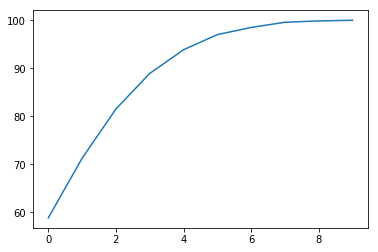

In [38]:
# Gráfico de % de Varianza Exlicado
plt.plot(var1)

In [39]:
hpc = PCA(n_components=4).fit_transform(pc_toarray)

### Hay que determinar el número de clusters, cómo lo hacemos?

Nos da una idea de la cantidad de clusters necesarios para segmentar nuestros datos.

In [42]:
# Determinar el valor de k (Número de Clusters)
k_range = range(1,20)

# Ajustar el algoritmo de K-Means para cada valor de k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]

In [43]:
# Extraer los centroides o centros de cluster para cada modelo ajustado
centroids = [X.cluster_centers_ for X in k_means_var]

In [44]:
# Calcular la distancia euclídea de cada punto a cada uno de los centros de cluster.
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
#k_euclid[0]
#k_euclid[1]
#k_euclid[2]

In [45]:
# Calcular la mínima distancia de cada punto a cada a un cluster
dist = [np.min(ke,axis=1) for ke in k_euclid]
dist[1]

array([3.02515128, 2.12681408, 2.27015489, 2.00481163, 1.96232163,
       1.56285758, 1.49638672, 1.38020127, 1.87438851, 2.40422629,
       1.47727388, 1.37893369, 3.59183261, 3.75142248, 2.12982669,
       0.89143185, 2.25606312, 0.79938874, 0.9698154 , 1.62190867,
       1.54918135, 1.22546936, 0.87617064, 2.78215983, 1.42282213,
       1.48839683, 2.2960168 , 1.61106875, 2.3051683 , 1.28295305,
       2.79982113, 2.49066293, 0.39911884, 2.34260027, 3.97856391,
       2.30836932, 1.78344805, 1.70364422, 2.88003193, 2.85831478,
       1.47681939, 0.79146458, 2.5561158 , 1.54035449, 1.60470776,
       2.44014267, 1.64482014, 1.54508206, 1.64225083, 3.37501645,
       0.50567736, 2.00581089, 0.9942475 , 1.13433661, 1.65132242,
       2.68591063, 2.43261034, 2.4243212 , 0.79328089, 2.64543461,
       2.48877559, 0.77631659, 2.38254591, 1.04973489, 1.73349851,
       3.42312797, 1.2444976 , 1.99315081, 2.55601921, 2.97670122,
       2.35905562, 1.34037821, 1.93865125, 1.25284608, 1.63984

In [46]:
# Hpc son las puntuaciones factoriales o nuevas variables que son combinaciones lineales de las anteriores
#hpc

In [47]:
# Vemos los centroides de cada clúster , si tenemos 1 cluster 1 centroide y así sucesivamente.
centroids[0]
#centroids[1]
#centroids[2]

array([[-1.05299503e-16,  6.40953499e-17,  2.97585553e-17,
        -4.43516930e-17]])

In [48]:
# Objeto que tiene las distancias a cada uno de los cluster
#k_euclid[0]
#k_euclid[1]
#k_euclid[2]

Calculamos la suma de los cuadrados de la distancia

In [49]:
avgWithinSumSquare = [sum(d)/hpc.shape[0] for d in dist]


Gráfica que nos permite determinar el número de clusters apropiados para la segmentación

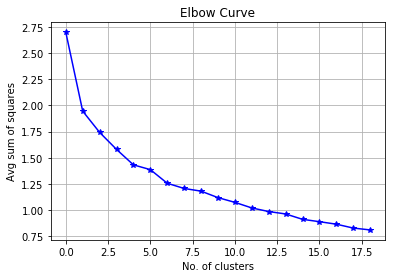

In [50]:
# Ploteamos el gráfico del codo de yambú para elegir el número apropiado de clusters
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avgWithinSumSquare, 'b*-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('Avg sum of squares')
tt = plt.title('Elbow Curve')

Tomando como referencia el gráfico, buscaremos 6 clusters

### Clustering de los paises en bases a sus indicadores de desarrollo

In [51]:
# Usamos el algoritmo de K-Means ++
km = KMeans(6, init='k-means++', random_state = 3425) 
km.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3425, tol=0.0001, verbose=0)

In [52]:
# Guardamos la variable del segmento o grupo en nustra base de datos
df['SegmentoPais'] = km.predict(hpc)
df.head()

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,1


In [53]:
# Cantidad de elementos por grupo
df.groupby('SegmentoPais').Anticoncepcion.count()

SegmentoPais
0    25
1    15
2    24
3    11
4    11
5    11
Name: Anticoncepcion, dtype: int64

In [54]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3',
    4:'Cluster4',
    5:'Cluster5'
}

df.SegmentoPais = df.SegmentoPais.map(clust_map)
df[:10]

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster3
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster0
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster5
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster2
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster1
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster0
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster0
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster2
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster1
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster4


In [56]:
df.to_csv('Dataset_Grupos.csv')

Analizamos el PBI vs mortalidad infantil en cada cluster.

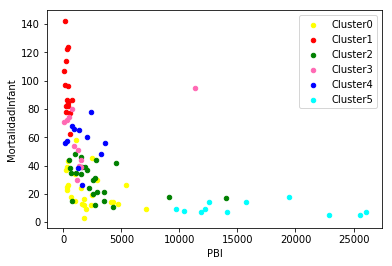

In [57]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink',
    'Cluster4':'blue',
    'Cluster5':'aqua'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='MortalidadInfant', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Cuando el PBI es bajo la mortalidad infantil es alta.

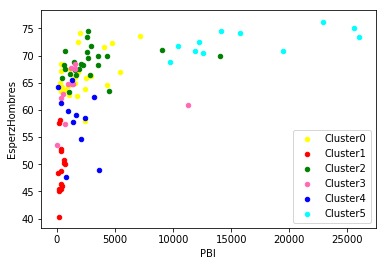

In [58]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='EsperzHombres', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

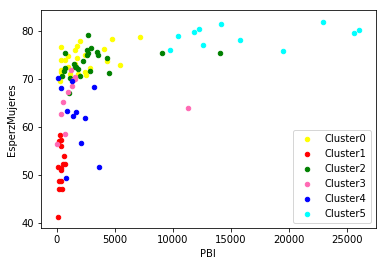

In [59]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='EsperzMujeres', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

Esperanza de vida se incrementa mientras el pais está más desarrollado

In [60]:
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans

labels = km.labels_
metrics.silhouette_score(hpc, labels, metric='euclidean')

0.2864590883854448

### Clustering Affinity Propagation

In [61]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(hpc)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [62]:
# Tamaño calculado para cada cluster
af.cluster_centers_indices_

array([ 7, 29, 32, 67])

In [121]:
# Etiqueta de cada cluster
#af.labels_

In [63]:
#Generamos las medidas idóneas de agrupación de clusters
#print('Número de cluster estimados: %d' % n_clusters_)
print("Coeficiente Silhouette: %0.3f"
      % metrics.silhouette_score(hpc, labels, metric='sqeuclidean'))

Coeficiente Silhouette: 0.411


In [48]:
df.head(1)

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,Cluster3


In [64]:
# Guardamos la variable del segmento o grupo en nustra base de datos, hacemos una copia de la información
df2=df.drop('SegmentoPais',axis=1)
df2.head(2)

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5


#### df2['SegmentoPais'] = af.predict(hpc)
df2.head()

In [57]:
# Cantidad de elementos por grupo
df2.groupby('SegmentoPais').Anticoncepcion.count()

SegmentoPais
0    29
1    27
2    26
3    15
Name: Anticoncepcion, dtype: int64

In [58]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3'
}

df2.SegmentoPais = df2.SegmentoPais.map(clust_map)
df2[:10]

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster0
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster3
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster0
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster2
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster3
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster0
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster2
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


Analizamos el PBI vs mortalidad infantil en cada cluster.

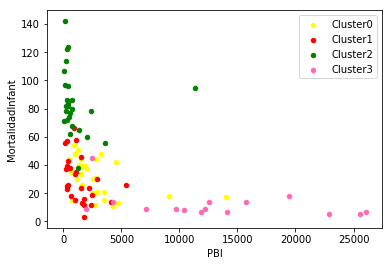

In [59]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink'
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='MortalidadInfant', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

Analizamos el PBI vs la esperanza de vida en hombres en cada cluster.

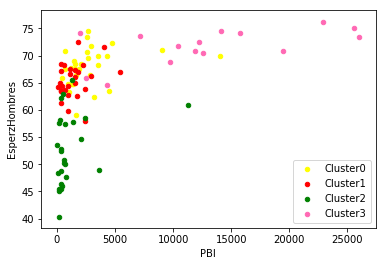

In [60]:
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df2[df2.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='EsperzHombres', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

### Clustering Jerárquicos

In [65]:
# Guardamos la variable del segmento o grupo en nustra base de datos, hacemos una copia de la información
df3=df.drop('SegmentoPais',axis=1)

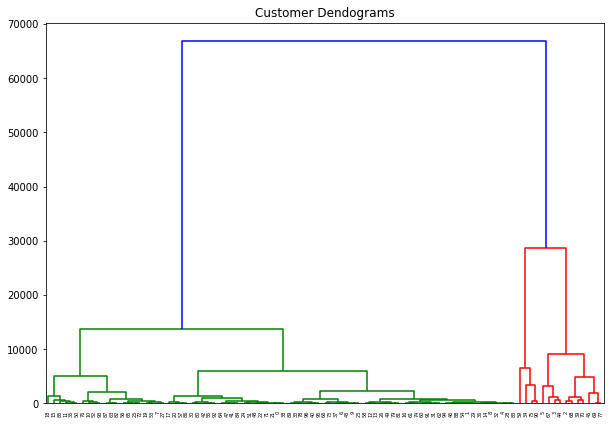

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df3, method='ward'))  

In [70]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage='ward',n_clusters=4)
model.fit(hpc)
labels = model.labels_

#Generamos las medidas idóneas de agrupación de clusters
print('Número de cluster estimados: %d' % 2)
print("Coeficiente Silhouette: %0.3f"
      % metrics.silhouette_score(hpc, labels, metric='sqeuclidean'))

Número de cluster estimados: 2
Coeficiente Silhouette: 0.455


In [71]:
df3['SegmentoPais'] = model.fit_predict(hpc)
df3.head()

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.1,51.0,2
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.3,0.5,1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.5,2.0,3
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.9,20.6,3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.6,73.9,2


In [72]:
# Cantidad de elementos por grupo
df3.groupby('SegmentoPais').Anticoncepcion.count()

SegmentoPais
0    18
1    48
2    17
3    14
Name: Anticoncepcion, dtype: int64

In [73]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2',
    3:'Cluster3'
}

df3.SegmentoPais = df3.SegmentoPais.map(clust_map)
df3[:10]

,TasaGlobalFecundidad,Anticoncepcion,EsperzHombres,EsperzMujeres,MortalidadInfant,PBI,ActEconomicHombres,ActEconomicMujeres,AlfabetHombres,AlfabetMujers,SegmentoPais
2,3.81,52.0,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.000,Cluster2
8,1.70,22.0,67.2,74.0,25.0,354.0,65.0,52.0,0.300,0.500,Cluster1
12,1.95,62.0,70.5,77.1,14.0,12545.0,81.2,67.0,1.500,2.000,Cluster3
13,2.97,53.0,71.1,75.3,18.0,9073.0,88.2,29.2,10.900,20.600,Cluster3
14,3.14,49.0,58.1,58.2,78.0,280.0,88.8,55.9,50.600,73.900,Cluster2
15,1.73,55.0,73.6,78.7,9.0,7173.0,73.4,61.4,2.000,3.200,Cluster3
16,1.40,50.0,64.4,74.8,15.0,994.0,76.4,61.3,0.300,0.600,Cluster1
18,3.66,47.0,73.4,76.1,30.0,2569.0,79.0,34.0,21.252,23.472,Cluster1
19,5.83,16.0,52.4,57.2,84.0,391.0,90.0,57.8,51.300,74.200,Cluster0
21,4.36,45.0,59.8,63.2,66.0,909.0,74.1,56.3,9.500,24.000,Cluster1


Analizamos el PBI vs mortalidad infantil en cada cluster.

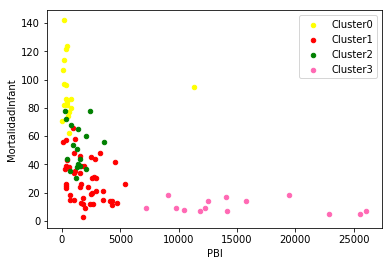

In [74]:
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green',
    'Cluster3':'hotpink' 
}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df3[df3.SegmentoPais == clust].plot(kind='scatter', x='PBI', y='MortalidadInfant', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

In [75]:
#FIN